In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)


<ipython-input-1-1e865e26ca98>:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)


In [2]:
DARK_CURRENT = 0.15 #e/p/s
READ_NOISE = 9.3 #e

In [3]:
df = pd.read_csv("./dataset2/database_dataset2.csv") 

In [4]:
df['SNR_AVG'] = df['s_source_AVG']/np.sqrt( df['s_source_AVG'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_AVG'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_median'] = df['s_source_median']/np.sqrt( df['s_source_median'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_median'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))

df['SNR_sum'] = df['s_source_sum']/np.sqrt( df['s_source_sum'] + df['npix_source']*(1+(df['npix_source']/df['npix_sky']))*(df['s_sky_sum'] + df['exposure_time']*DARK_CURRENT + READ_NOISE**2))


In [5]:
df.to_csv("./dataset2/database_dataset2.csv", index=False)

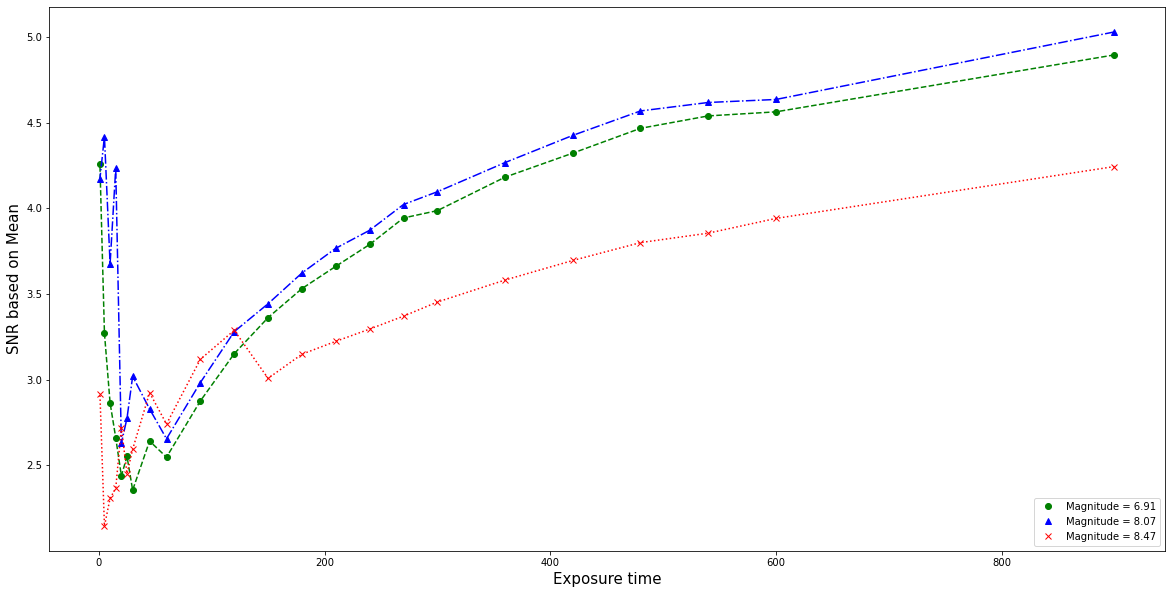

In [6]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'go', label='Magnitude = 6.91')
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_AVG"], 'g--')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_AVG"], 'b^', label='Magnitude = 8.07')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_AVG"], 'b-.')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_AVG"], 'rx', label='Magnitude = 8.47')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_AVG"], 'r:')
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Mean',fontsize=15)
ax1.legend(loc=4, fontsize=10)


# plt.savefig('snr_expt_filters.png')
plt.show()

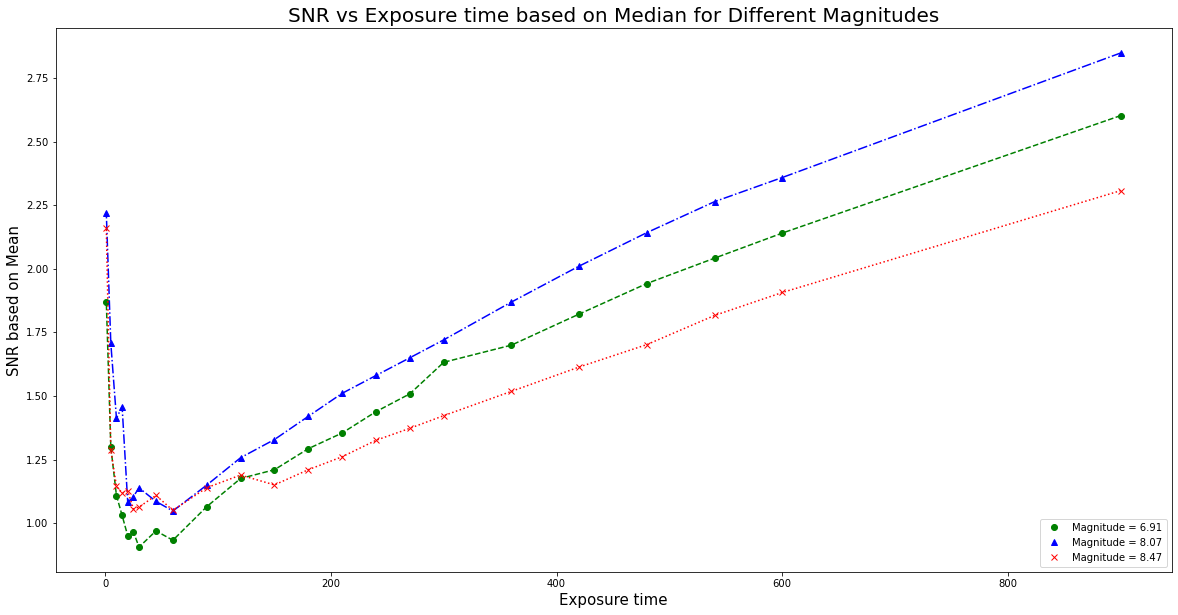

In [7]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_median"], 'g--')
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_median"], 'go', label='Magnitude = 6.91')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_median"], 'b^', label='Magnitude = 8.07')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_median"], 'b-.')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_median"], 'rx', label='Magnitude = 8.47')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_median"], 'r:')
ax1.set_title('SNR vs Exposure time based on Median for Different Magnitudes', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Mean',fontsize=15)
ax1.legend(loc=4, fontsize=10)


# plt.savefig('snr_expt_filters.png')
plt.show()

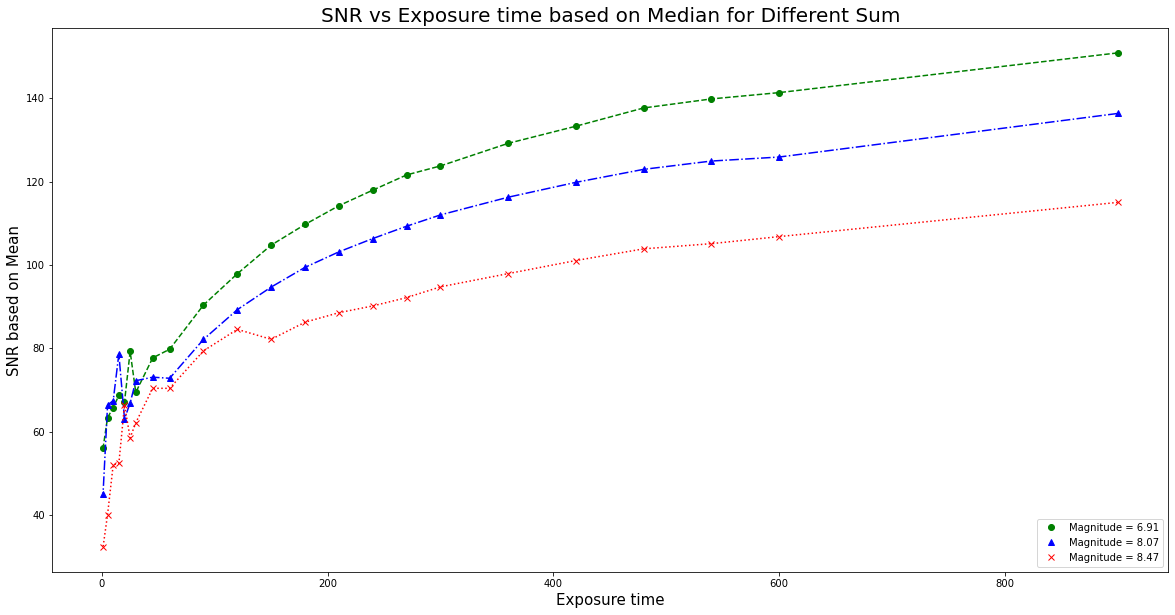

In [9]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_sum"], 'g--')
plt.plot(df[df["Magnitude"] == 6.91]["exposure_time"], df[df["Magnitude"] == 6.91]["SNR_sum"], 'go', label='Magnitude = 6.91')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_sum"], 'b^', label='Magnitude = 8.07')
plt.plot(df[df["Magnitude"] == 8.07]["exposure_time"], df[df["Magnitude"] == 8.07]["SNR_sum"], 'b-.')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_sum"], 'rx', label='Magnitude = 8.47')
plt.plot(df[df["Magnitude"] == 8.47]["exposure_time"], df[df["Magnitude"] == 8.47]["SNR_sum"], 'r:')
ax1.set_title('SNR vs Exposure time based on Median for Different Sum', fontsize=20)
ax1.set_xlabel('Exposure time', fontsize=15)
ax1.set_ylabel('SNR based on Mean',fontsize=15)
ax1.legend(loc=4, fontsize=10)


# plt.savefig('snr_expt_filters.png')
plt.show()